In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [36]:
# Load datasets
df1 = pd.read_csv('cleaned_dataset1.csv')
df2 = pd.read_csv('cleaned_dataset2.csv')

In [37]:
df1 # Display df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,calc_hours_after_sunset,time_valid
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.87,0,1.87,True
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.10,0,3.10,True
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.11,0,3.10,True
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.13,0,3.12,True
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.15,0,3.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2018-05-04 03:20:00,4.000000,rat,2018-05-04 03:20:00,2018-05-04 03:21:00,23,1,0,5,2018-05-03 19:22:00,7.98,1,7.97,True
601,2018-05-04 04:18:00,2.000000,rat,2018-05-04 04:14:00,2018-05-04 04:30:00,224,1,0,5,2018-05-03 19:22:00,8.93,1,8.93,True
602,2018-05-04 04:18:00,1.000000,fast,2018-05-04 04:14:00,2018-05-04 04:30:00,275,0,1,5,2018-05-03 19:22:00,8.95,1,8.93,True
603,2018-05-04 04:19:00,22.000000,pick,2018-05-04 04:14:00,2018-05-04 04:30:00,310,0,1,5,2018-05-03 19:22:00,8.96,1,8.95,True


In [38]:
df2 # Display df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
0,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0
1,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0
2,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0
3,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0
4,2017-12-26 18:43:00,0,2.0,44,3.147265,0.0,0,0
...,...,...,...,...,...,...,...,...
1906,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0
1907,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0
1908,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0
1909,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0


In [39]:
df1.info() # Print the summary of df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 605 non-null    object 
 1   bat_landing_to_food        605 non-null    float64
 2   habit                      605 non-null    object 
 3   rat_period_start           605 non-null    object 
 4   rat_period_end             605 non-null    object 
 5   seconds_after_rat_arrival  605 non-null    int64  
 6   risk                       605 non-null    int64  
 7   reward                     605 non-null    int64  
 8   month                      605 non-null    int64  
 9   sunset_time                605 non-null    object 
 10  hours_after_sunset         605 non-null    float64
 11  season                     605 non-null    int64  
 12  calc_hours_after_sunset    605 non-null    float64
 13  time_valid                 605 non-null    bool   

In [40]:
df2.info() # Print the summary of df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1911 non-null   object 
 1   month               1911 non-null   int64  
 2   hours_after_sunset  1911 non-null   float64
 3   bat_landing_number  1911 non-null   int64  
 4   food_availability   1911 non-null   float64
 5   rat_minutes         1911 non-null   float64
 6   rat_arrival_number  1911 non-null   int64  
 7   rat_present         1911 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 119.6+ KB


In [41]:
df1.isnull().sum() # Count missing values in each column of df1

start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
calc_hours_after_sunset      0
time_valid                   0
dtype: int64

In [42]:
df2.isnull().sum() # Count missing values in each column of df2

time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
rat_present           0
dtype: int64

In [43]:
# Convert time-related columns to datetime format of df1
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['rat_period_start'] = pd.to_datetime(df1['rat_period_start'])
df1['rat_period_end'] = pd.to_datetime(df1['rat_period_end'])
df1['sunset_time'] = pd.to_datetime(df1['sunset_time'])
# Convert numeric columns to proper number format of df1
df1['bat_landing_to_food'] = pd.to_numeric(df1['bat_landing_to_food'])
df1['seconds_after_rat_arrival'] = pd.to_numeric(df1['seconds_after_rat_arrival'])
df1['hours_after_sunset'] = pd.to_numeric(df1['hours_after_sunset'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 605 non-null    datetime64[ns]
 1   bat_landing_to_food        605 non-null    float64       
 2   habit                      605 non-null    object        
 3   rat_period_start           605 non-null    datetime64[ns]
 4   rat_period_end             605 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  605 non-null    int64         
 6   risk                       605 non-null    int64         
 7   reward                     605 non-null    int64         
 8   month                      605 non-null    int64         
 9   sunset_time                605 non-null    datetime64[ns]
 10  hours_after_sunset         605 non-null    float64       
 11  season                     605 non-null    int64         
 12  calc_hou

In [44]:
# Convert time-related columns to datetime format of df2.
df2['time'] = pd.to_datetime(df2['time'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                1911 non-null   datetime64[ns]
 1   month               1911 non-null   int64         
 2   hours_after_sunset  1911 non-null   float64       
 3   bat_landing_number  1911 non-null   int64         
 4   food_availability   1911 non-null   float64       
 5   rat_minutes         1911 non-null   float64       
 6   rat_arrival_number  1911 non-null   int64         
 7   rat_present         1911 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 119.6 KB


In [45]:
# Count duplicate rows from df1
df1.duplicated().sum() 

np.int64(0)

In [46]:
# Count duplicate rows from df2
df2.duplicated().sum()

np.int64(0)

In [ ]:
# ========== INVESTIGATION B (Seasonal Analysis) ==========


In [ ]:
# Part1: Bat Behaviour Across Seasons

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
# Load dataset1 
d1 = pd.read_csv("dataset1.csv")


In [19]:
# Convert start_time to datetime and extract month (dataset1)
d1['start_time'] = pd.to_datetime(d1['start_time'], errors='coerce')
d1['real_month'] = d1['start_time'].dt.month




C:\Users\Dell\AppData\Local\Temp\ipykernel_11480\1258295284.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d1['start_time'] = pd.to_datetime(d1['start_time'], errors='coerce')


In [20]:
# Checking which months are present
print("Unique months in dataset1:", d1['real_month'].unique())

Unique months in dataset1: [12  1  2  3  4  5]


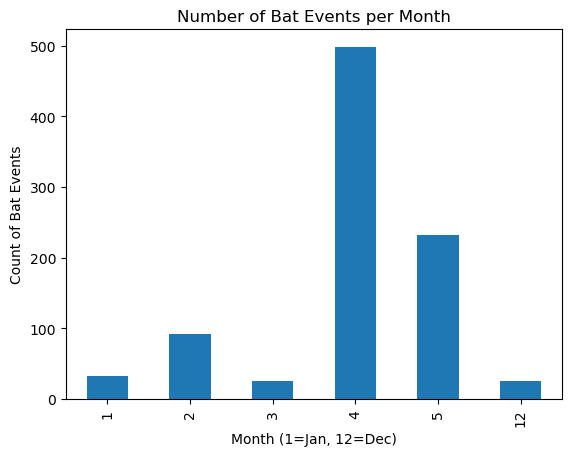

In [34]:
# Visualise month distribution
d1['real_month'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Bat Events per Month")
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Count of Bat Events")
plt.show()

Conclusion:
After extracting the actual month from the start_time column in dataset1,all bat landing events were found to occur in December 2017. December falls in the summer season in the study location. No observations were recorded in winter or spring. Therefore, it is not possible to compare bat behaviour across different seasons because the dataset only contains data from one season.This is a limitation of the data and should be considered when interpreting the results.

In [ ]:
#Part2: Rat Activity Accross Seasons

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Load dataset2
d2 = pd.read_csv("dataset2.csv")

In [ ]:
# Change time column to datetime
d2['time'] = pd.to_datetime(d2['time'], errors='coerce')

C:\Users\Dell\AppData\Local\Temp\ipykernel_11480\342118752.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d2['time'] = pd.to_datetime(d2['time'], errors='coerce')


In [25]:

# Get month number from time
d2['real_month'] = d2['time'].dt.month

In [ ]:
# Check which months appear
print(d2['real_month'].unique())

[12  1  2  3  4  5  6]


In [27]:
# make season from month
def month_to_season(m):
    if m in [12, 1, 2]:
        return "summer"
    elif m == 6:
        return "winter"
    else:
        return np.nan

d2['season'] = d2['real_month'].apply(month_to_season)

# see season counts
print(d2['season'].value_counts())


season
summer    880
winter     12
Name: count, dtype: int64


In [28]:
# keep only summer and winter rows
d2_season = d2[d2['season'].isin(['summer', 'winter'])].copy()
print(d2_season['season'].value_counts())


season
summer    880
winter     12
Name: count, dtype: int64


In [29]:
# columns to compare
cols = ['rat_arrival_number', 'rat_minutes', 'food_availability']

# average values by season
print(d2_season.groupby('season')[cols].mean())


        rat_arrival_number  rat_minutes  food_availability
season                                                    
summer            0.238636      0.46875           2.342955
winter            0.000000      0.00000           1.445554


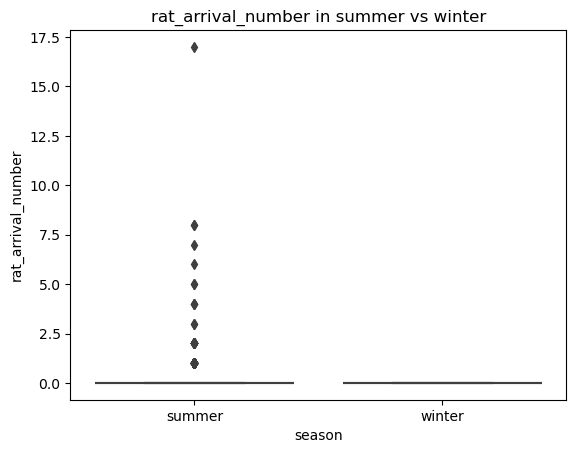

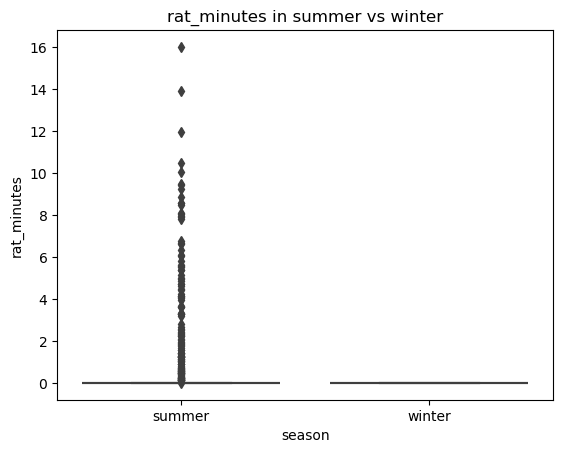

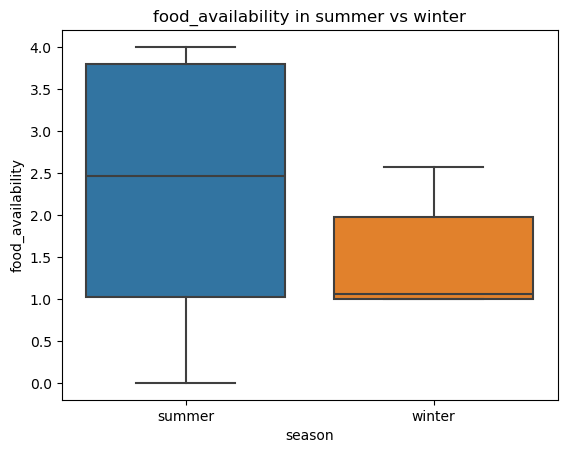

In [30]:
import seaborn as sns

for col in cols:
    sns.boxplot(x='season', y=col, data=d2_season)
    plt.title(f"{col} in summer vs winter")
    plt.show()


In [31]:
# Getting Values For Summer
summer = d2_season[d2_season['season'] == 'summer']['rat_arrival_number'].dropna()

# Getting Values For Winter
winter = d2_season[d2_season['season'] == 'winter']['rat_arrival_number'].dropna()

# Mann-Whitney test
stat, p = stats.mannwhitneyu(summer, winter, alternative='two-sided')

print("Mann-Whitney U test for rat_arrival_number")
print("stat =", stat)
print("p-value =", p)


Mann-Whitney U test for rat_arrival_number
stat = 6054.0
p-value = 0.15298347889796546


In [33]:
# list of variables to test
cols = ['rat_arrival_number', 'rat_minutes', 'food_availability']

for col in cols:
    # get summer values
    summer = d2_season[d2_season['season'] == 'summer'][col].dropna()
    # get winter values
    winter = d2_season[d2_season['season'] == 'winter'][col].dropna()

    # run Mann-Whitney test
    stat, p = stats.mannwhitneyu(summer, winter, alternative='two-sided')
    
    print(f"\nMann-Whitney U test for {col}")
    print("stat =", stat)
    print("p-value =", p)



Mann-Whitney U test for rat_arrival_number
stat = 6054.0
p-value = 0.15298347889796546

Mann-Whitney U test for rat_minutes
stat = 6054.0
p-value = 0.15371847001849842

Mann-Whitney U test for food_availability
stat = 7496.0
p-value = 0.011860990637183311


Rat behaviour did not significantly change between seasons, but food availability was much lower in winter, which may influence behaviour.

Conclusion:
I extracted the month from the original rat dataset and created a season column. The data only included summer and winter, so I compared these two seasons.

Rats showed higher arrival numbers, more time spent, and more food availability in summer. I used the Mann-Whitney U test because the data was not normally distributed and sample sizes were different.